In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [20]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [3]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [4]:
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
import os

# Specify the path to your SQLite database file
database_path = '/Users/kamalova/Desktop/April BootCamp/Homework_submission/Module_10/flask_part2_boooooth/hawaii.sqlite'

# Check if the database file exists
if not os.path.exists(database_path):
    raise FileNotFoundError(f"The database file at {database_path} does not exist")

# Create the engine using the correct path and SQLite protocol specifier
engine = create_engine(f'sqlite:///{database_path}')

# Declare a Base using `automap_base()`
Base = automap_base()

# Prepare the Base by reflecting the database schema
Base.prepare(autoload_with=engine)

# Print all of the classes mapped to the Base
print(Base.classes.keys())

# Assign the measurement class to a variable called `Measurement`
Measurement = Base.classes.measurement

# Now you can create a session and query the database
session = Session(engine)
results = session.query(Measurement).all()

# Example: Print the first result
if results:
    print(results[0])
else:
    print("No results found.")


['station', 'measurement']


In [5]:
# Print all of the classes mapped to the Base
print(Base.classes.keys())

['station', 'measurement']


In [6]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [8]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
print(recent_date)

2017-08-23


['station', 'measurement']
            date  precipitation
0     2016-08-24           0.08
1006  2016-08-24            NaN
1524  2016-08-24           2.15
702   2016-08-24           2.28
360   2016-08-24           2.15
...          ...            ...
1522  2017-08-22           0.00
1523  2017-08-23           0.08
359   2017-08-23           0.00
1005  2017-08-23           0.00
2222  2017-08-23           0.45

[2223 rows x 2 columns]


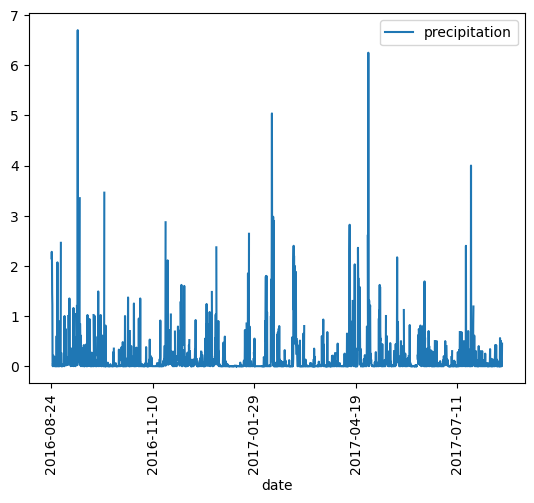

In [14]:
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
import os
import pandas as pd
from datetime import datetime, timedelta    

# Specify the path to your SQLite database file
database_path = '/Users/kamalova/Desktop/April BootCamp/Homework_submission/Module_10 /Resources/hawaii.sqlite'

# Check if the database file exists
if not os.path.exists(database_path):
    raise FileNotFoundError(f"The database file at {database_path} does not exist")

# Create the engine using the correct path and SQLite protocol specifier
engine = create_engine(f'sqlite:///{database_path}')

# Declare a Base using `automap_base()`
Base = automap_base()

# Prepare the Base by reflecting the database schema
Base.prepare(autoload_with=engine)

# Print all of the classes mapped to the Base
print(Base.classes.keys())

# Assign the measurement class to a variable called `Measurement`
Measurement = Base.classes.measurement

# Now you can create a session and query the database
session = Session(engine)

# Calculate the date one year from the last date in data set.
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
last_date_obj = datetime.strptime(last_date, "%Y-%m-%d")
one_year_ago = last_date_obj - timedelta(days=365)

# Query for the precipitation data for the last year
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=['date', 'precipitation'])

# Sort the dataframe by date
df = df.sort_values(by=['date'])
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='date', y='precipitation', rot=90)
# Print the DataFrame
print(df)



In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_data = pd.read_csv('/Users/kamalova/Desktop/April BootCamp/Homework_submission/Module_10 /Resources/hawaii_measurements.csv')
summary_stats = precip_data['prcp'].describe()
print(summary_stats)

count    18103.000000
mean         0.160644
std          0.468746
min          0.000000
25%          0.000000
50%          0.010000
75%          0.110000
max         11.530000
Name: prcp, dtype: float64


# Exploratory Station Analysis

In [23]:
from sqlalchemy import create_engine
import os

# Ensure the file path is correct
db_path = "/Users/kamalova/Desktop/April BootCamp/Homework_submission/Module_10/Resources/hawaii.sqlite"

# Check if the file exists
if not os.path.exists(db_path):
    raise FileNotFoundError(f"The database file at {db_path} does not exist.")

# Create the engine with an absolute path
engine = create_engine(f"sqlite:///{db_path}")

# Connect to the database
with engine.connect() as connection:
    # Execute the query
    results = connection.execute("SELECT COUNT(*) FROM Station").fetchall()

# Print the results
print(results)


FileNotFoundError: The database file at /Users/kamalova/Desktop/April BootCamp/Homework_submission/Module_10/Resources/hawaii.sqlite does not exist.

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

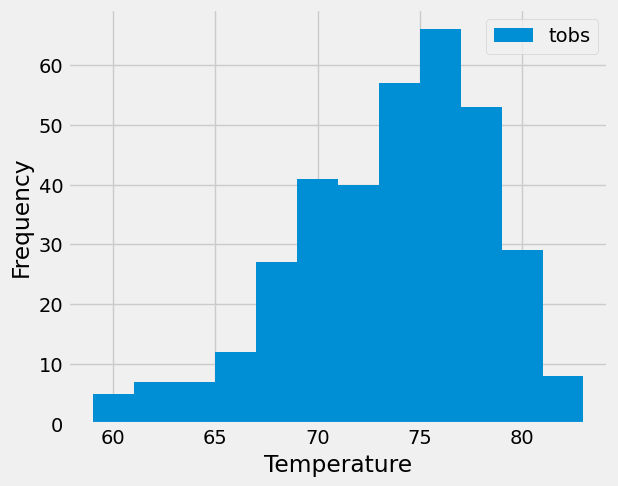

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()
